<a href="https://colab.research.google.com/github/MuhammadSyahidan/PCVK_2023/blob/main/PCVK_UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **UAS PCVK**


**Import Library**

In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import imutils
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import zipfile
import re
import cv2
import random
import os
from PIL import Image
import subprocess
from google.colab.patches import cv2_imshow
from tensorflow.keras.models import load_model
from imutils.contours import sort_contours

**Sambungkan drive**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **MNIST Creation Model**
**Load MNIST**

In [5]:
from tensorflow.keras.datasets import mnist

In [6]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [7]:
# Check shape data
(train_data.shape, test_data.shape)

((60000, 28, 28), (10000, 28, 28))

In [8]:
# Check shape labels
(train_labels.shape, test_labels.shape)

((60000,), (10000,))

In [9]:
# Check each data shape --> should be 28*28
train_data[0].shape

(28, 28)

In [10]:
# Check the label
train_labels.shape

(60000,)

**Combine train and test data**

In [11]:
digits_data = np.vstack([train_data, test_data])
digits_labels = np.hstack([train_labels, test_labels])

In [12]:
# Check data shape
digits_data.shape

(70000, 28, 28)

In [13]:
# Check label shape
digits_labels.shape

(70000,)

Text(0.5, 1.0, 'Class: 8')

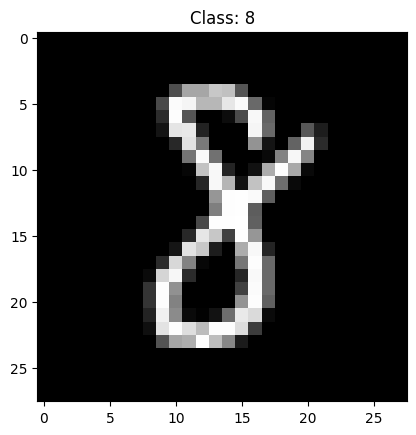

In [14]:
# Randomly checking the data
idx = np.random.randint(0, digits_data.shape[0])
plt.imshow(digits_data[idx], cmap='gray')
plt.title('Class: ' + str(digits_labels[idx]))

<Axes: xlabel='Labels', ylabel='count'>

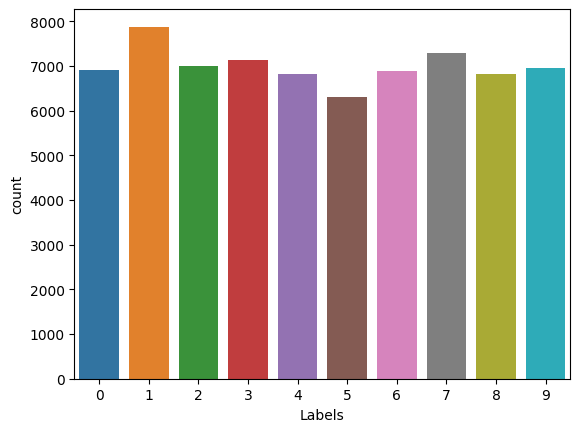

In [15]:
# Check data distribution
df_labels = pd.DataFrame(digits_labels, columns=['Labels'])
sns.countplot(df_labels, x='Labels')

**Load Kaggle A-Z**

In [16]:
!wget https://iaexpert.academy/arquivos/alfabeto_A-Z.zip

--2023-12-12 03:20:28--  https://iaexpert.academy/arquivos/alfabeto_A-Z.zip
Resolving iaexpert.academy (iaexpert.academy)... 162.159.134.42
Connecting to iaexpert.academy (iaexpert.academy)|162.159.134.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 193643888 (185M) [application/zip]
Saving to: ‘alfabeto_A-Z.zip’

alfabeto_A-Z.zip    100%[===================>] 184.67M   151MB/s    in 1.2s    

2023-12-12 03:20:30 (151 MB/s) - ‘alfabeto_A-Z.zip’ saved [193643888/193643888]



In [17]:
# Extract zip file
zip_object = zipfile.ZipFile(file = 'alfabeto_A-Z.zip', mode = 'r')
zip_object.extractall('./')
zip_object.close()

In [18]:
dataset_az = pd.read_csv('A_Z Handwritten Data.csv').astype('float32')
dataset_az

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372446,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# Get pixel data only
alphabet_data = dataset_az.drop('0', axis=1)
# Get labels only
alphabet_labels = dataset_az['0']

In [20]:
# Check shape data
alphabet_data.shape, alphabet_labels.shape

((372450, 784), (372450,))

In [21]:
# Check shape labels
alphabet_labels.shape

(372450,)

In [22]:
# Reshape pixel data to 28*28
alphabet_data = np.reshape(alphabet_data.values, (alphabet_data.shape[0], 28, 28))
# Check the result by its shape
alphabet_data.shape

(372450, 28, 28)

Text(0.5, 1.0, 'Class: 14.0')

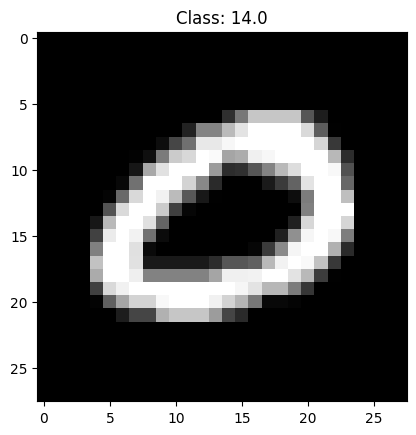

In [23]:
# Randomly checking A-Z dataset
index = np.random.randint(0, alphabet_data.shape[0])
plt.imshow(alphabet_data[index], cmap = 'gray')
plt.title('Class: ' + str(alphabet_labels[index]))

<Axes: xlabel='Labels', ylabel='count'>

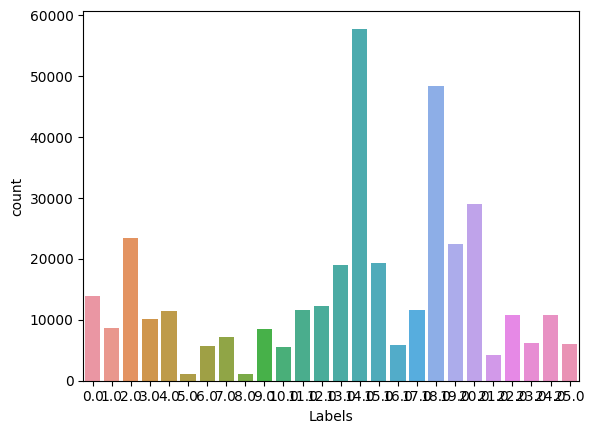

In [24]:
# Check data distribution
df_az_labels = pd.DataFrame({
    'Labels': alphabet_labels.values
})
sns.countplot(df_az_labels, x='Labels')

**Combine Dataset (MNIST + Kaggel A-Z)**

In [25]:
# Check unique value from digits_labels
np.unique(digits_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [26]:
# Check unique value from alphabet_labels
np.unique(alphabet_labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.],
      dtype=float32)

In [27]:
# We already know that digits labels containt labels from 0-9 (10 labels)
# We also know that alphabet labels start from 0-25 which represent A-Z
# If we want to combine them, the A-Z labels should continuing the digits label

alphabet_labels += 10

In [28]:
# check alphabet labels again
np.unique(alphabet_labels)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
       23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.],
      dtype=float32)

In [29]:
# Combine both of them
data = np.vstack([alphabet_data, digits_data])
labels = np.hstack([alphabet_labels, digits_labels])

In [30]:
# Check the shape
data.shape, labels.shape

((442450, 28, 28), (442450,))

In [31]:
# Check labels
np.unique(labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35.], dtype=float32)

In [32]:
# Convert data to float32
data = np.array(data, dtype = 'float32')

In [33]:
# Since Convolutional need 3d data (including depth)
# and our images only in 2d data (because in grayscale format)
# we need to add "the depth" to the data
data = np.expand_dims(data, axis=-1)

# check shape
data.shape

(442450, 28, 28, 1)

**Preprocessing**

In [34]:
# Normalize data
data /= 255.0

In [35]:
# Check range value of data
data[0].min(), data[0].max()

(0.0, 1.0)

In [36]:
# Enconde the labels
# LabelBinarizer similar with OneHotEncoder
le = LabelBinarizer()
labels = le.fit_transform(labels)

In [37]:
# Check labels shape
labels.shape

(442450, 36)

Text(0.5, 1.0, '[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]')

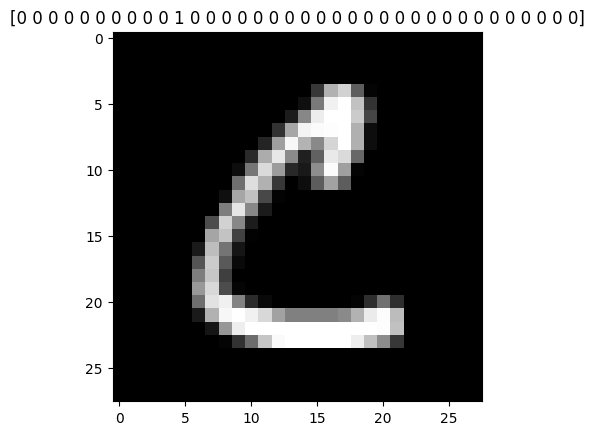

In [38]:
# Check data with label binarizer's label
plt.imshow(data[30000].reshape(28,28), cmap='gray')
plt.title(str(labels[0]))

In [39]:
# Since our data is not balance, we will handle it by giving weight for 'small' data

# Check number of data for each labels first
classes_total = labels.sum(axis = 0)
classes_total

array([ 6903,  7877,  6990,  7141,  6824,  6313,  6876,  7293,  6825,
        6958, 13869,  8668, 23409, 10134, 11440,  1163,  5762,  7218,
        1120,  8493,  5603, 11586, 12336, 19010, 57825, 19341,  5812,
       11566, 48419, 22495, 29008,  4182, 10784,  6272, 10859,  6076])

In [40]:
# Check the biggest value of data
classes_total.max()

57825

In [41]:
# Create a weight for each data
classes_weights = {}
for i in range(0, len(classes_total)):
  #print(i)
  classes_weights[i] = classes_total.max() / classes_total[i]

# Check the weight for each data
classes_weights

{0: 8.376792698826597,
 1: 7.340992763742541,
 2: 8.272532188841202,
 3: 8.097605377398123,
 4: 8.473769050410317,
 5: 9.15967052114684,
 6: 8.409685863874346,
 7: 7.928835870012341,
 8: 8.472527472527473,
 9: 8.310577752227651,
 10: 4.169370538611291,
 11: 6.671089063221043,
 12: 2.4702037677816224,
 13: 5.7060390763765545,
 14: 5.0546328671328675,
 15: 49.72055030094583,
 16: 10.035577924331829,
 17: 8.011221945137157,
 18: 51.629464285714285,
 19: 6.808548216178029,
 20: 10.320364090665715,
 21: 4.990937338166753,
 22: 4.6875,
 23: 3.0418200946870066,
 24: 1.0,
 25: 2.989762680316426,
 26: 9.94924294562973,
 27: 4.999567698426422,
 28: 1.1942625828703608,
 29: 2.5705712380529007,
 30: 1.993415609487038,
 31: 13.827116212338593,
 32: 5.362110534124629,
 33: 9.21954719387755,
 34: 5.3250759738465785,
 35: 9.51695194206715}

**Split Data to Train and Test**

In [42]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 1, stratify = labels)

**Create Data Augmentation**

In [43]:
# Import library
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [44]:
augmentation = ImageDataGenerator(rotation_range = 10, zoom_range=0.05, width_shift_range=0.1,
                                  height_shift_range=0.1, horizontal_flip = False)

**Build CNN Model**

In [45]:
# Import library
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [46]:
# Build the network
network = Sequential()

network.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters = 64, kernel_size=(3,3), activation='relu', padding='same'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters = 128, kernel_size=(3,3), activation='relu', padding='valid'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Flatten())

network.add(Dense(64, activation = 'relu'))
network.add(Dense(128, activation = 'relu'))

# output
network.add(Dense(36, activation='softmax'))

network.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [47]:
# Check network summary
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

In [48]:
# Create actual labels
name_labels = '0123456789'
name_labels += 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
name_labels = [l for l in name_labels]

# Check actual label
print(name_labels)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [49]:
import joblib

joblib.dump(name_labels, "labels.pkl")

['labels.pkl']

In [50]:
a = joblib.load("labels.pkl")
print(a)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


**Train model**

In [51]:
# Set model name, epoch, and batch size
file_model = 'custom_ocr.model'
epochs = 20
batch_size = 128

In [52]:
# Setup checkpoint
checkpointer = ModelCheckpoint(file_model, monitor = 'val_loss', verbose = 1, save_best_only=True)

In [53]:
# Fit the model
history = network.fit(augmentation.flow(X_train, y_train, batch_size=batch_size),
                      validation_data = (X_test, y_test),
                      steps_per_epoch = len(X_train) // batch_size, epochs=epochs,
                      class_weight = classes_weights, verbose=1, callbacks=[checkpointer])

Epoch 1/20
2765/2765 [==============================] - ETA: 0s - loss: 2.1677 - accuracy: 0.8269
Epoch 1: val_loss improved from inf to 0.26582, saving model to custom_ocr.model
2765/2765 [==============================] - 179s 60ms/step - loss: 2.1677 - accuracy: 0.8269 - val_loss: 0.2658 - val_accuracy: 0.8916
Epoch 2/20
2765/2765 [==============================] - ETA: 0s - loss: 0.9791 - accuracy: 0.9014
Epoch 2: val_loss improved from 0.26582 to 0.19190, saving model to custom_ocr.model
2765/2765 [==============================] - 151s 55ms/step - loss: 0.9791 - accuracy: 0.9014 - val_loss: 0.1919 - val_accuracy: 0.9264
Epoch 3/20
2765/2765 [==============================] - ETA: 0s - loss: 0.8203 - accuracy: 0.9136
Epoch 3: val_loss did not improve from 0.19190
2765/2765 [==============================] - 150s 54ms/step - loss: 0.8203 - accuracy: 0.9136 - val_loss: 0.2539 - val_accuracy: 0.8860
Epoch 4/20
2765/2765 [==============================] - ETA: 0s - loss: 0.7363 - accu

**Save and load The Model**

In [54]:
# The result will show in colab directory
save_path ='/content/drive/MyDrive/dataset/models/PCVK/network.h5'
network.save(save_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [55]:
save_path = '/content/drive/MyDrive/dataset/models/PCVK/network.h5'
load_network = load_model(save_path)


**Evaluate Model - Make a Single Prediction**

In [56]:
# make a prediction
predictions = load_network.predict(X_test, batch_size=batch_size)

692/692 [==============================] - 2s 3ms/step


In [57]:
# Check prediction for data-0
# You will get the probability for each label
# The highest one is the prediction
predictions[10]

array([4.95158226e-09, 8.09046908e-14, 9.99725441e-11, 4.01588011e-07,
       1.51370192e-14, 4.12747636e-03, 7.73561562e-11, 1.31235575e-14,
       9.41032212e-08, 1.11844952e-06, 3.77725078e-18, 3.88768129e-10,
       4.52597471e-09, 6.28805452e-10, 2.05991420e-13, 2.60460481e-18,
       6.69021404e-07, 9.53910390e-18, 1.79987429e-18, 1.21036499e-06,
       7.65931779e-14, 1.68946454e-11, 9.68028554e-15, 1.14827446e-13,
       9.35682021e-09, 9.16973528e-13, 1.39789317e-11, 2.99976443e-21,
       9.95868981e-01, 4.37231523e-13, 4.24384167e-10, 5.18398954e-17,
       1.60503161e-16, 5.44176793e-20, 1.05370487e-11, 4.43969514e-13],
      dtype=float32)

In [58]:
# Get the actual prediction -> highest probability
np.argmax(predictions[10])

28

In [59]:
# Check label for 24
name_labels[28]

'S'

In [60]:
# Check y_test label for 0
y_test[10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [61]:
# check the highest value
np.argmax(y_test[10])

28

In [62]:
# Check the label of y_test 0
name_labels[np.argmax(y_test[10])]

'S'

**Evaluate Model - Make an Evaluation on Test Data**

In [63]:
# Evaluate on test data
load_network.evaluate(X_test, y_test)

2766/2766 [==============================] - 11s 4ms/step - loss: 0.1500 - accuracy: 0.9499


[0.14995406568050385, 0.9498700499534607]

In [64]:
# Print Classification Report
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names = name_labels))

              precision    recall  f1-score   support

           0       0.33      0.70      0.45      1381
           1       0.97      0.99      0.98      1575
           2       0.94      0.95      0.95      1398
           3       0.95      0.99      0.97      1428
           4       0.92      0.97      0.94      1365
           5       0.79      0.92      0.85      1263
           6       0.93      0.98      0.95      1375
           7       0.97      0.99      0.98      1459
           8       0.85      0.99      0.92      1365
           9       0.95      0.99      0.97      1392
           A       0.99      0.99      0.99      2774
           B       0.99      0.94      0.96      1734
           C       0.99      0.99      0.99      4682
           D       0.94      0.96      0.95      2027
           E       0.99      0.99      0.99      2288
           F       0.97      1.00      0.98       233
           G       0.98      0.90      0.94      1152
           H       0.98    

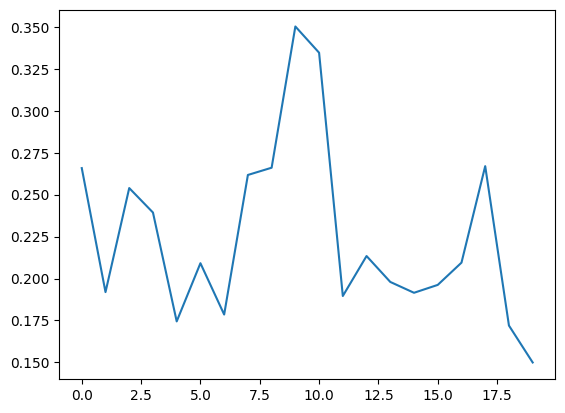

In [65]:
# Visualize loss value for each epoch
plt.plot(history.history['val_loss'])

In [66]:
# You can also check the another metrics
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

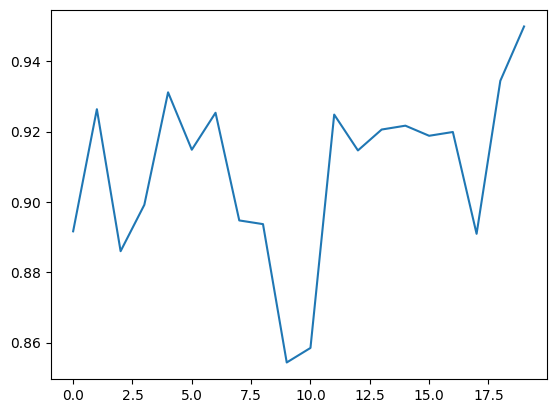

In [67]:
# Check the model performance by validation accuracy
plt.plot(history.history['val_accuracy'])

**Testing on Real Image**

In [68]:
# Import library
from tensorflow.keras.models import load_model

In [69]:
save_path = '/content/drive/MyDrive/dataset/models/PCVK/network.h5'
load_network = load_model(save_path)

In [70]:
# Check summary
load_network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

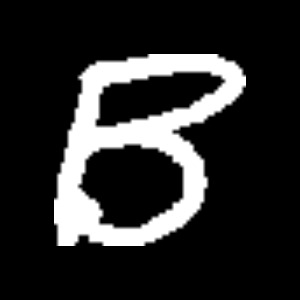

In [71]:
# Load Image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/img/B.jpeg')
cv2_imshow(img)

In [72]:
# Check shape
img.shape

(300, 300, 3)

In [73]:
# Convert to gray
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# check shape
gray_img.shape

(300, 300)

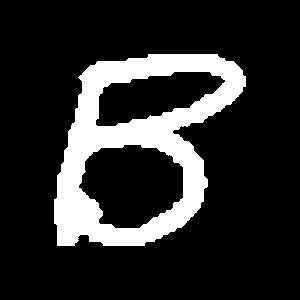

123.0


In [74]:
# Pre-process
# Binary Threshold and Otsu
value, thresh = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

cv2_imshow(thresh)

# print threshold value
print(value)

In [75]:
# Resize image in order to match network input shape -> 28*28
img_resize = cv2.resize(gray_img, (28,28))
cv2_imshow(img_resize)

In [76]:
img_resize.shape

(28, 28)

In [77]:
# Convert to float 32
# and extend the dimension since network input shape is 28*28*1
img_input = img_resize.astype('float32') / 255 # also perform normalization
img_input = np.expand_dims(img_input, axis=-1) # insert depth

# check shape
img_input.shape

(28, 28, 1)

In [78]:
# Add "amount of data" as dimension
img_input = np.reshape(img_input, (1,28,28,1))
img_input.shape

(1, 28, 28, 1)

In [79]:
# Make a predition
prediction = load_network.predict(img_input)
pred_label = np.argmax(prediction) # predict actual label
pred_label

1/1 [==============================] - 0s 172ms/step


11

In [80]:
# check label for 6
name_labels[11]

'B'

# **Character Recognition**

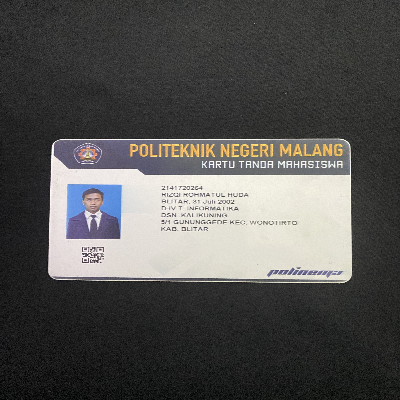

In [108]:
img = cv2.imread('/content/drive/MyDrive/UAS/3C_2141720264_1 - RIZQI ROHMATUL HUDA.jpeg')

resized_img = cv2.resize(img, (400, 400))
# show image
cv2_imshow(resized_img)

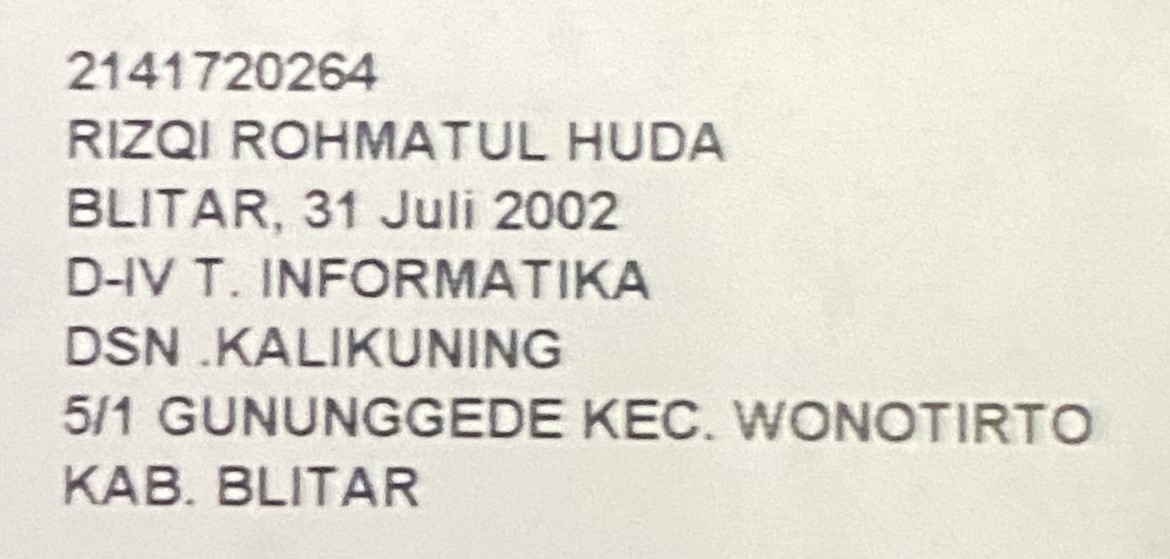

In [82]:
img = cv2.imread('/content/drive/MyDrive/UAS/3C_2141720264_1 - RIZQI ROHMATUL HUDA SS.jpeg')
# show image
cv2_imshow(img)

**Convert to Gray**

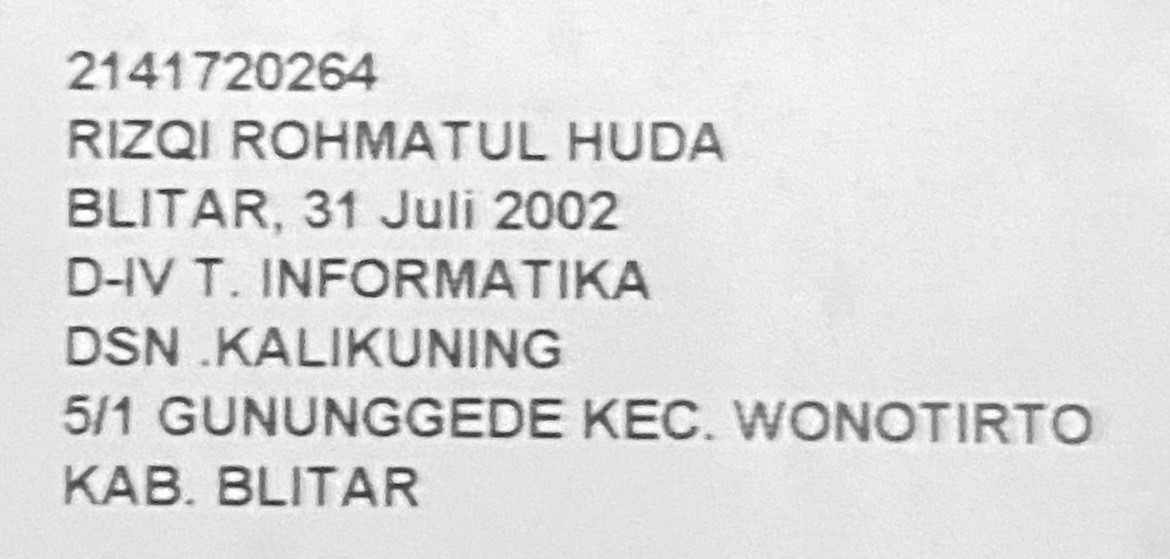

In [83]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# show
cv2_imshow(gray)

**Remove Noise -> Gaussian Blur**

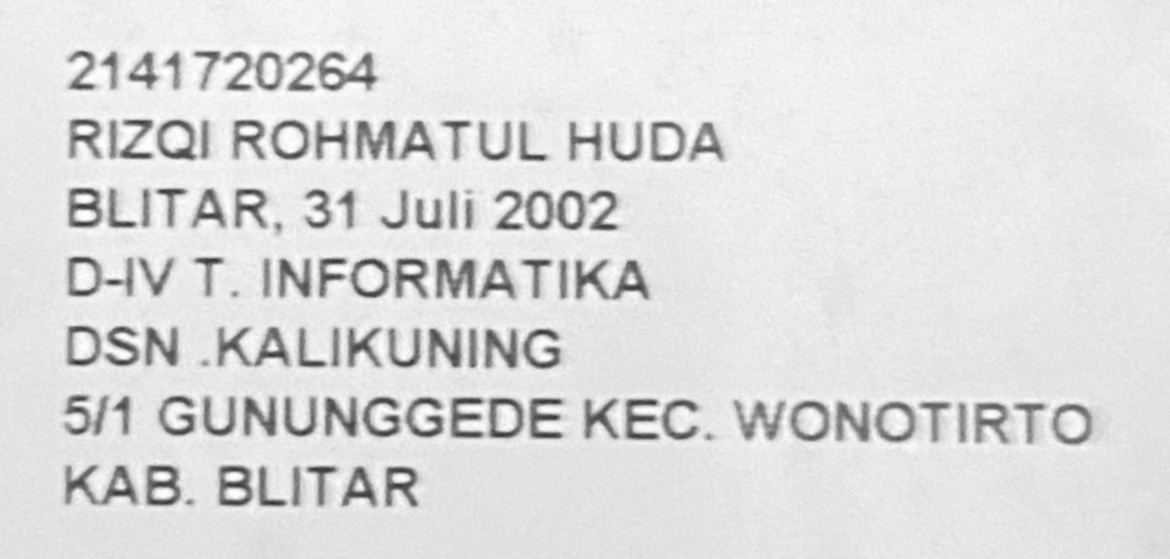

In [84]:
blur = cv2.GaussianBlur(gray, (3,3), 0)
# check
cv2_imshow(blur)

**Adaptive Thresholding**

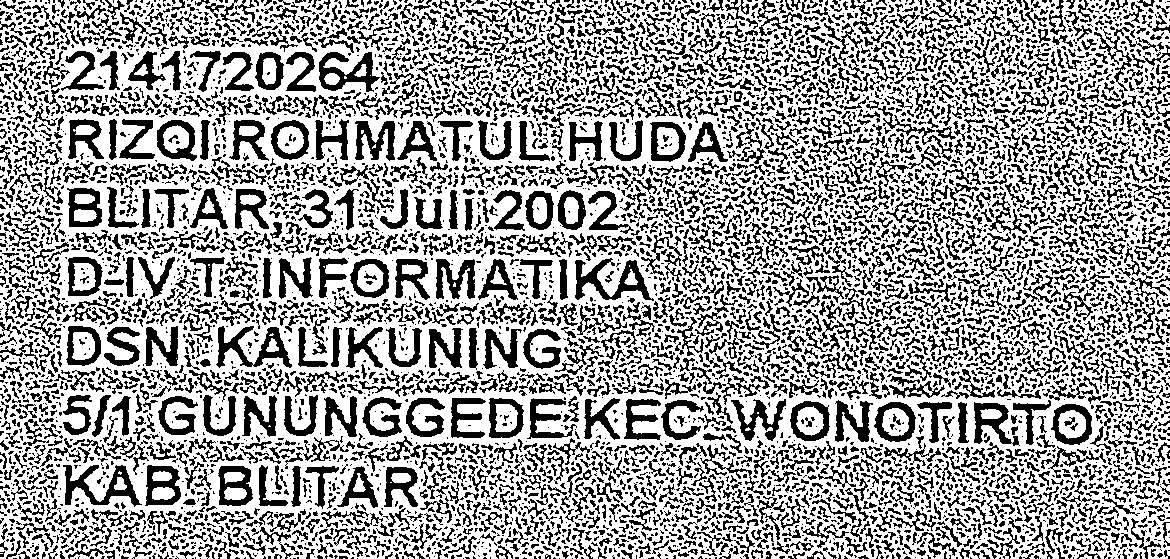

In [85]:
adaptive = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 1)
# check
cv2_imshow(adaptive)

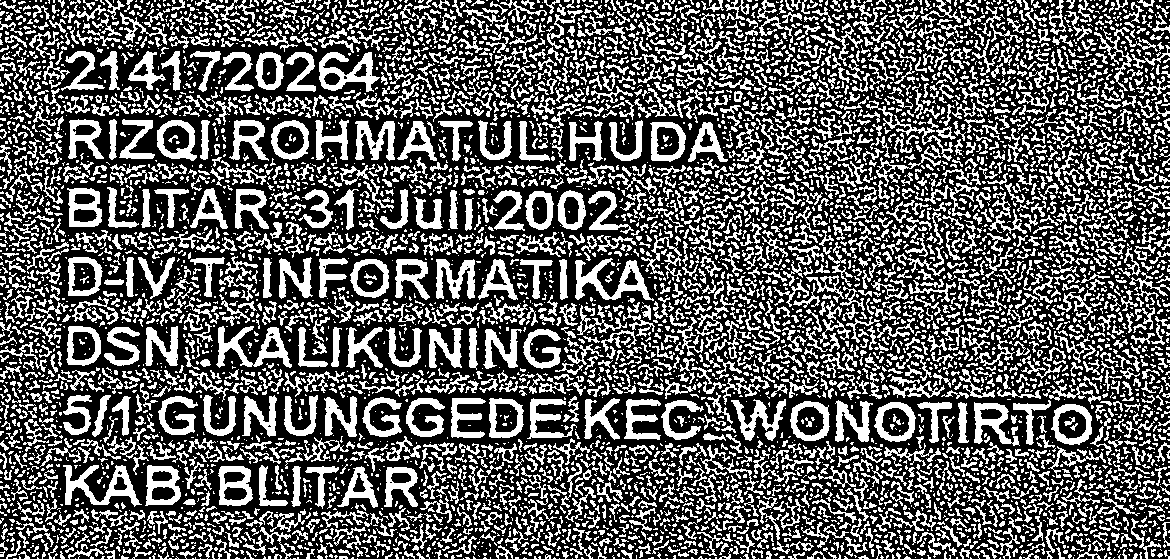

In [86]:
# inverse image since we trained out model
# with black background
invertion = 255 - adaptive
# check
cv2_imshow(invertion)

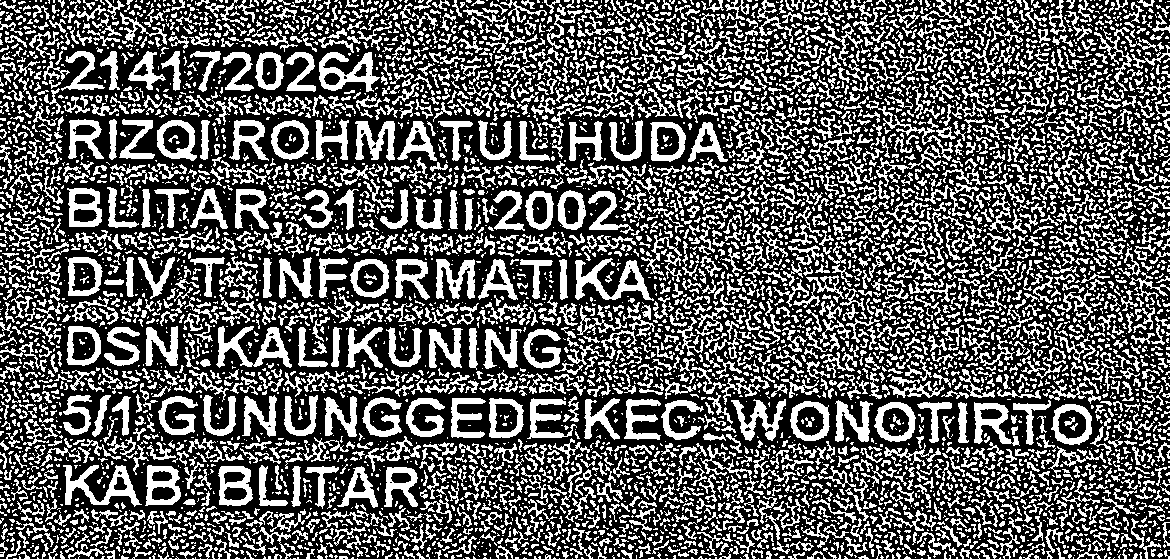

In [87]:
# Test erode
erode = cv2.erode(invertion, np.ones((1,1)))
cv2_imshow(erode)

**Pre-processing - Contour Detection**

In [88]:
# Define function for contour detection
def find_contours(img):
  conts = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  conts = imutils.grab_contours(conts)
  conts = sort_contours(conts, method='left-to-right')[0]

  return conts

In [89]:
conts = find_contours(erode.copy())

In [90]:
len(conts)

6615

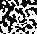

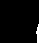

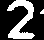

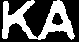

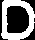

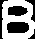

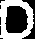

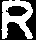

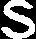

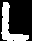

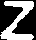

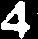

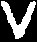

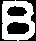

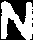

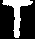

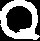

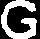

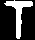

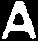

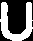

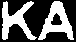

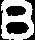

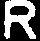

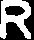

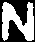

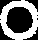

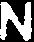

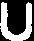

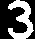

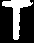

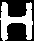

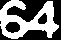

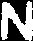

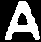

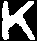

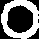

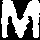

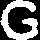

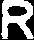

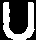

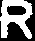

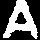

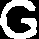

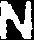

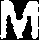

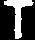

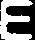

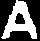

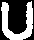

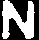

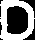

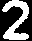

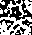

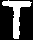

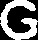

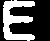

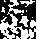

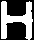

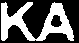

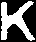

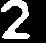

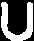

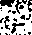

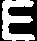

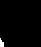

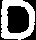

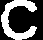

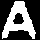

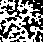

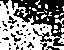

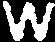

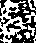

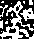

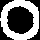

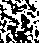

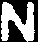

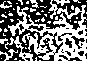

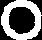

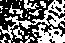

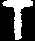

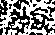

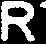

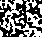

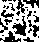

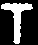

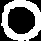

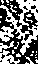

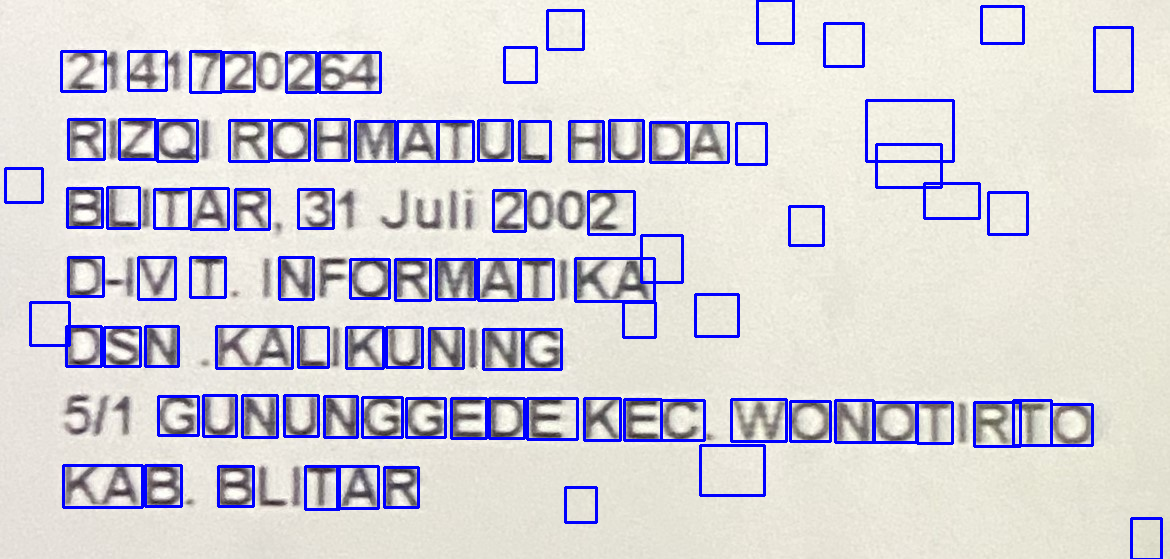

In [91]:
# Get the char based on contour

# Setup min/max width/hight for char
min_w, max_w = 30, 160
min_h, max_h = 34, 140
img_copy = img.copy() # original image for plotting countour result
filtered_conts = []

for c in conts:
  (x, y, w, h) = cv2.boundingRect(c) # find bounding box based on contour
  if(w >= min_w and w <= max_w) and (h >= min_h and h <= max_h): # if pixel follow this rule, it consider as char
    filtered_conts.append(c)
    roi = gray[y:y+h, x:x+w] # get region of interest for char
    thresh = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    cv2_imshow(thresh) # check

    # Build bounding box on original image
    cv2.rectangle(img_copy, (x,y), (x+w, y+h), (255,0,0), 2)

# Show bounding box on original image
cv2_imshow(img_copy)

**ROI extraction**

In [92]:
def extract_roi(img, margin=2):
  roi = img[y - margin:y+h, x - margin:x + w + margin]
  return roi

# Thresholding
def thresholding(img):
  thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
  return thresh

# Resizing
def resize_img(img, w, h):
  if w > h:
    resized = imutils.resize(img, width=28)
  else:
    resized = imutils.resize(img, height=28)

  # (w, h) = resized.shape
  (h, w) = resized.shape

  # Calculate how many pixels need to fill char image
  dX = int(max(0, 28 - w) / 2.0)
  dY = int(max(0, 28 - h) / 2.0)

  filled = cv2.copyMakeBorder(resized, top=dY, bottom=dY, right=dX, left=dX, borderType=cv2.BORDER_CONSTANT, value=(0,0,0))
  filled = cv2.resize(filled, (28,28))

  return filled

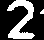

In [93]:
# Demo for enlarge
(x, y, w, h) = cv2.boundingRect(filtered_conts[2])
test_image = thresholding(gray[y:y+h, x:x+w])

# show original test image
cv2_imshow(test_image)

# Show enlarge test image
cv2_imshow(cv2.resize(test_image, (28,28)))

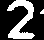

In [94]:
(h, w) = test_image.shape

test_image2 = resize_img(test_image, w, h)

cv2_imshow(test_image)
cv2_imshow(test_image2)

**Normalization**

In [95]:
def normalization(img):
  img = img.astype('float32') / 255.0 # convert to floating point
  img = np.expand_dims(img, axis=-1) # add depth
  return img

In [96]:
# Check
test_image2.shape, normalization(test_image2).shape

((28, 28), (28, 28, 1))

**Detection**

In [97]:
def process_box(gray, x, y, w, h):

  roi = extract_roi(gray)
  thresh = thresholding(roi)
  (h, w) = thresh.shape
  resized = resize_img(thresh, w, h)

  # show result
  cv2_imshow(resized)

  normalized = normalization(resized)

  return (normalized, (x, y, w, h))

In [98]:
# Detect every single char from contour
detected_char = []

for c in conts:
  (x, y, w, h ) = cv2.boundingRect(c)

  min_w, max_w = 30, 160
  min_h, max_h = 34, 140

  if(w >= min_w and w <= max_w) and (h >= min_h and h <= max_h):
    detected_char.append(process_box(gray, x, y, w, h))

AttributeError: ignored

In [99]:
detected_char[0][1]

(5, 168, 41, 36)

In [100]:
# Get all char pixel
pixels = np.array([px[0] for px in detected_char], dtype='float32')

# Get all box for detected char
boxes = [box[1] for box in detected_char]

In [101]:
pixels.shape

(79, 28, 28, 1)

**Recognize Character**

In [102]:
digits = '0123456789'
letters = 'ABCDEFGHIJKLMNOPQRSTUVWZYZ'
char_list = digits + letters
char_list = [ch for ch in char_list]

print(char_list)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'Z', 'Y', 'Z']


In [103]:
save_path = '/content/drive/MyDrive/dataset/models/PCVK/network.h5'
load_network = load_model(save_path)

In [104]:
# Predict
preds = load_network.predict(pixels)

3/3 [==============================] - 0s 45ms/step


In [105]:
# Char Prediction
for p in preds:
  char_idx = np.argmax(p)
  print(char_list[char_idx], end = " ")

B Y 2 M D B D R S L Z 4 V B N T 0 G T A T U M 8 2 R R N 0 N U 2 L 3 T H 4 N A K 0 N 0 R U R A G N N T E A U N D 2 8 L T 0 E E R H M K 2 U G E L D C A B G W Z 

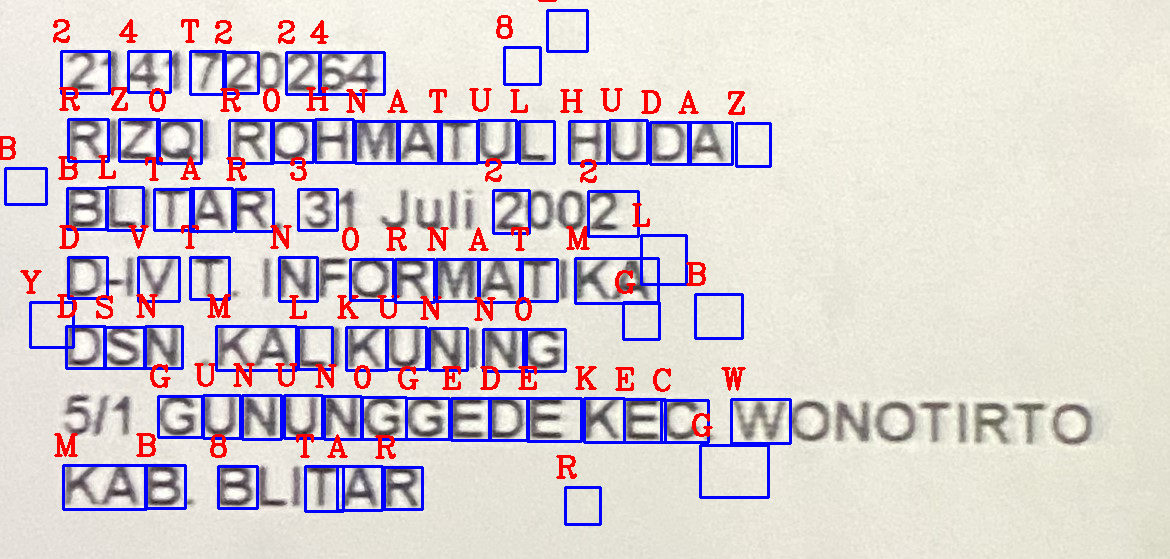

In [106]:
# Show char with actual image
img_copy2 = img.copy()

for(pred, (x, y, w, h)) in zip(preds, boxes):
  i = np.argmax(pred)
  char_detected = char_list[i]

  cv2.rectangle(img_copy2, (x, y), (x+w, y+h), (255,0,0), 2)
  cv2.putText(img_copy2, char_detected, (x - 10, y - 10), cv2.FONT_HERSHEY_COMPLEX, 1, (0,0,255), 2)

cv2_imshow(img_copy2)